In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [8]:
startup1 = pd.read_csv("C:/Users/SHIVAM/OneDrive/Desktop/Data science Assignment/Multilinear regression/50_Startups.csv")

## EDA

In [61]:
startup1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [10]:
startup1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [11]:
startup1.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [14]:
startup = startup1.rename(columns={"R&D Spend":"RD","Marketing Spend":"Marketing"})

In [15]:
startup.head()

,RD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


C:\Users\SHIVAM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RD', ylabel='Density'>

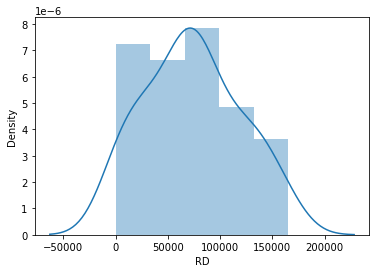

In [16]:
sns.distplot(startup['RD'])

C:\Users\SHIVAM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Administration', ylabel='Density'>

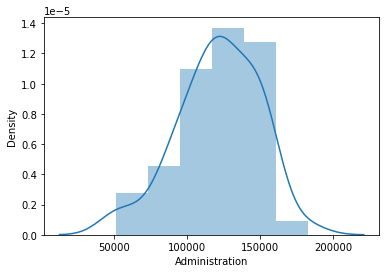

In [17]:
sns.distplot(startup['Administration'])

C:\Users\SHIVAM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Marketing', ylabel='Density'>

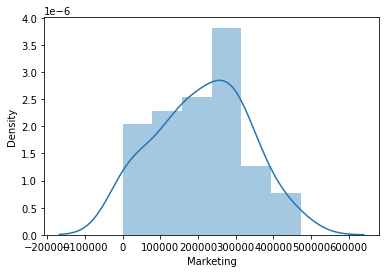

In [18]:
sns.distplot(startup['Marketing'])

## Correlation

In [20]:
startup.corr()

,RD,Administration,Marketing,Profit
RD,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


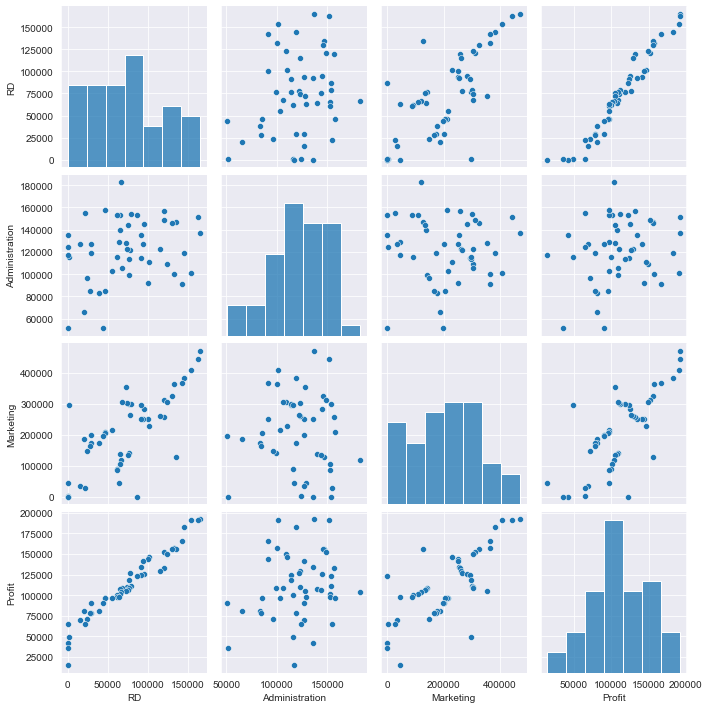

In [21]:
sns.set_style(style='darkgrid')
sns.pairplot(startup)

## Model

In [23]:
model = smf.ols('Profit~RD+Administration+Marketing',data=startup).fit()

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           4.53e-30
Time:                        22:50:38   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD                 0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing          0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
print(model.tvalues, '\n' , model.pvalues)

Intercept          7.626218
RD                17.846374
Administration    -0.525507
Marketing          1.655077
dtype: float64 
 Intercept         1.057379e-09
RD                2.634968e-22
Administration    6.017551e-01
Marketing         1.047168e-01
dtype: float64


In [28]:
(model.rsquared , model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [34]:
rsq_rd = smf.ols('RD~Administration+Marketing',data=startup).fit().rsquared
vif_rd = 1/1-rsq_rd  #0.5949
vif_rd

0.4050381775426065

In [38]:
rsq_adm = smf.ols('Administration~RD+Marketing',data=startup).fit().rsquared
vif_adm = 1/1-rsq_adm #0.1490
vif_adm

0.8509979176048249

In [40]:
rsq_mar = smf.ols('Marketing~RD+Administration',data=startup).fit().rsquared
vif_mar = 1/1-rsq_mar #0.5702
vif_mar

0.42977973147174975

In [44]:
df = {'Variables':['RD','Administration','Marketing'],'VIF':[0.4050,0.8509,0.4297]}
df1 = pd.DataFrame(df)
df1

,Variables,VIF
0,RD,0.4050
1,Administration,0.8509
2,Marketing,0.4297


## Residual Analysis

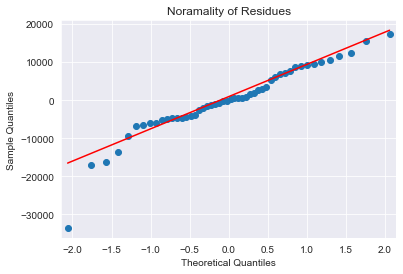

In [49]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title('Noramality of Residues')
plt.show()

In [51]:
list(np.where(model.resid<-20000))

[array([49], dtype=int64)]

## Homoscedasticity

In [52]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

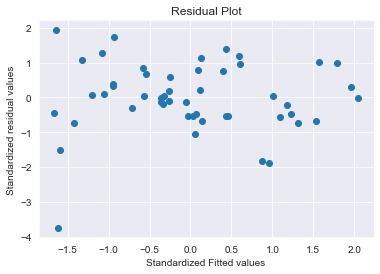

In [53]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors plot

eval_env: 1


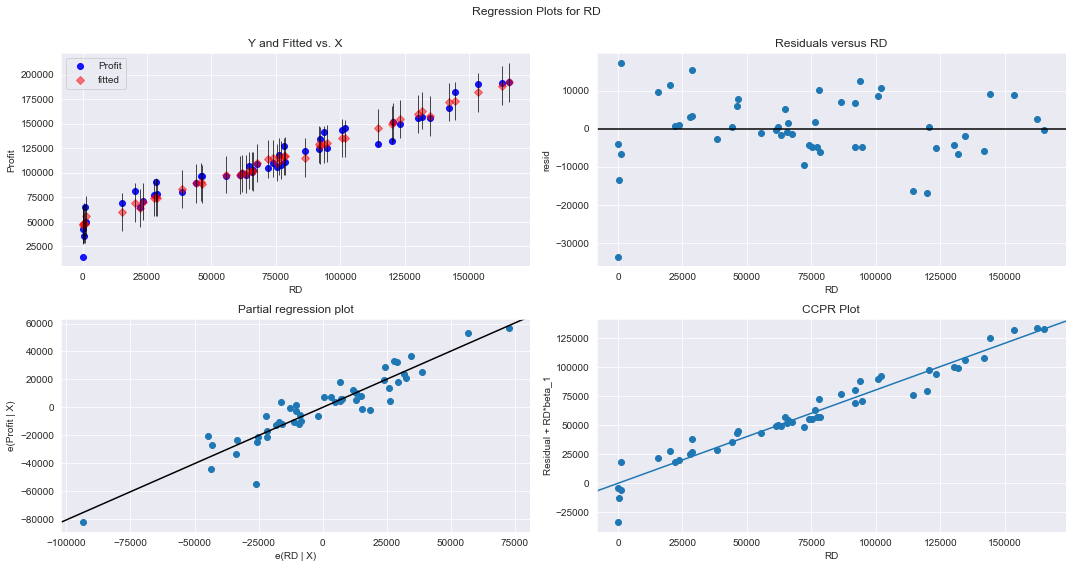

In [54]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD", fig=fig)
plt.show()

eval_env: 1


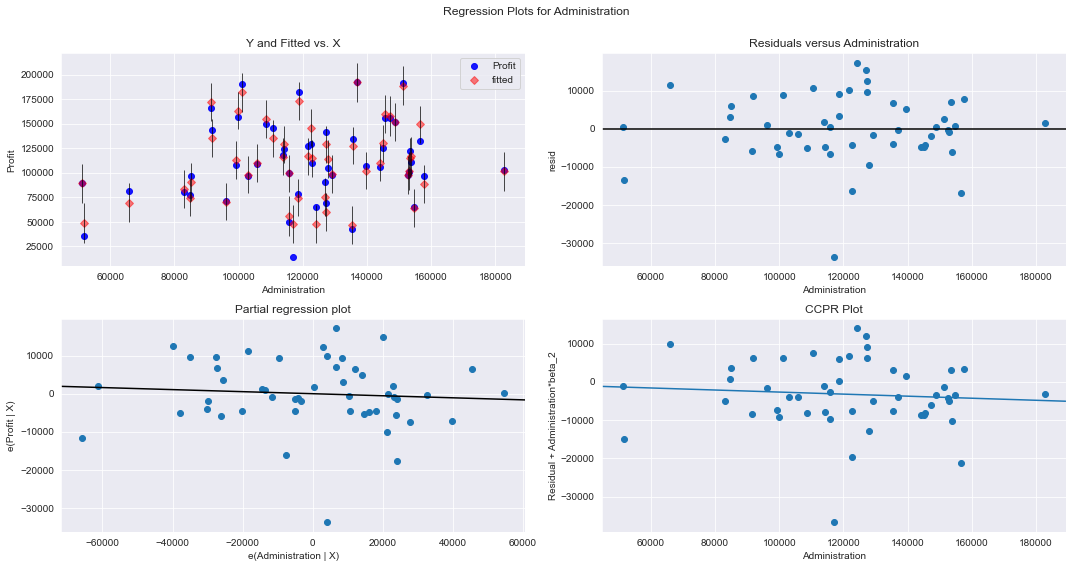

In [55]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration",fig=fig)
plt.show()

eval_env: 1


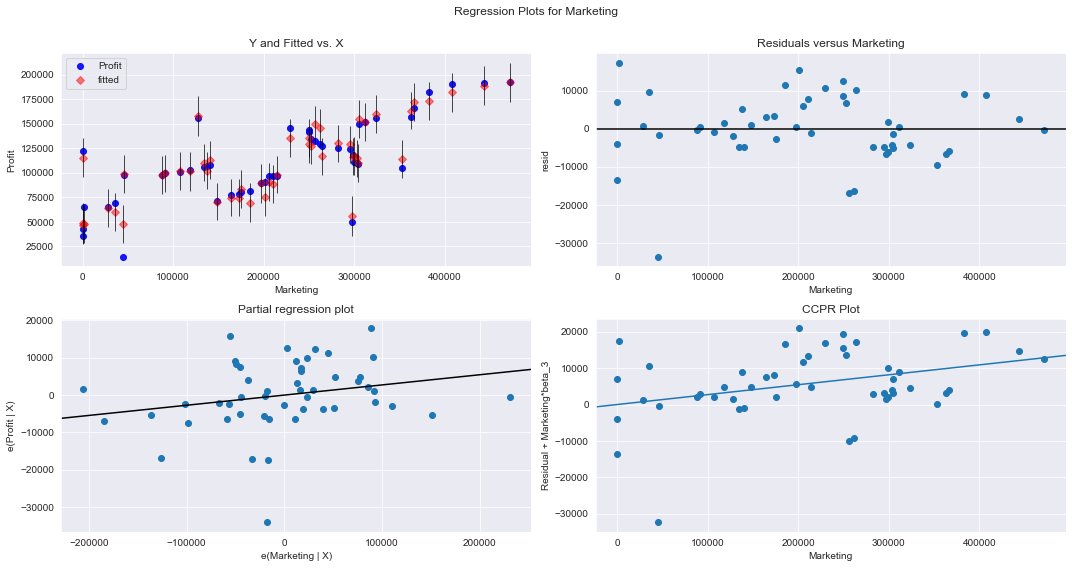

In [57]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing", fig=fig)
plt.show()

## Finding Outliers by using Cooks Distance

In [58]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

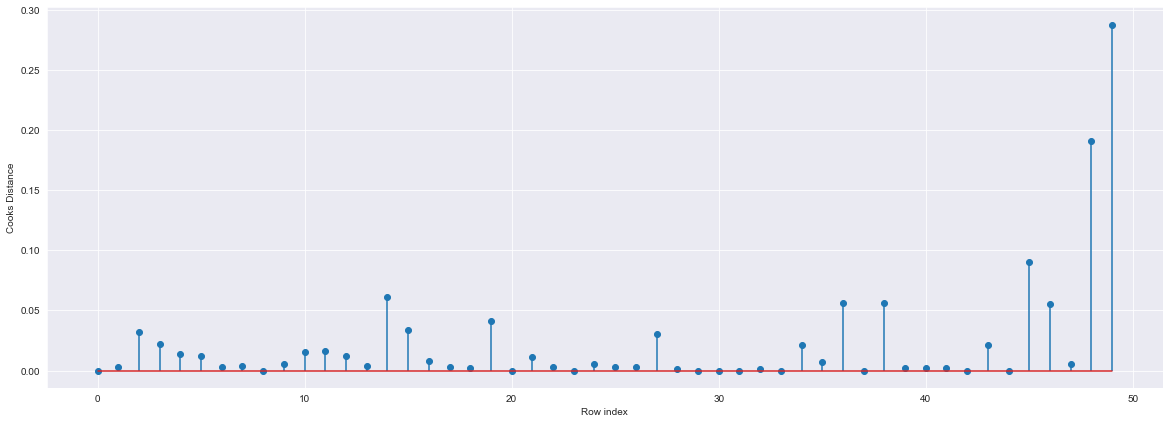

In [60]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len()), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [62]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

## High Influence Points

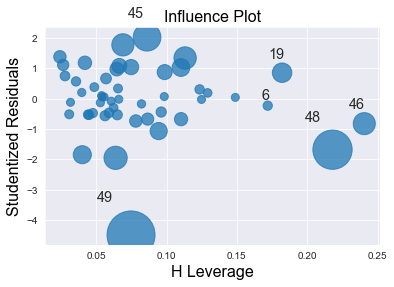

In [63]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [65]:
k = startup.shape[1]
n = startup.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.36

In [66]:
startup[startup.index.isin([49])]

,RD,Administration,Marketing,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [68]:
startup.head()

,RD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Model Improvemnet

In [97]:
df = startup.drop(startup.index[[49]],axis=0)

In [98]:
df

,RD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Build model

In [101]:
model2 = smf.ols('Profit~RD+Administration+Marketing',data=df).fit()

In [102]:
model2.rsquared,final_m.rsquared_adj

(0.9613162435129847, 0.9587373264138503)

## Predictions

In [114]:
data1 = pd.DataFrame({"RD":15505.73,"Administration":127382.30,"Marketing":35534.17},index=[1])
data1

,RD,Administration,Marketing
1,15505.73,127382.3,35534.17


In [115]:
model2.predict(data1)

1    62592.049718
dtype: float64

In [116]:
d2={'Prep_Models':['Model','Model2'],'Rsquared':[model.rsquared,model2.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Model2,0.961316


Model2 has 96% Rsquare value.